# Mid Bootcamp Classification Project

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing CSV

In [2]:
df = pd.read_excel('creditcardmarketing.xlsx')

### Normalising column header names

In [3]:
df.columns = ['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance']

In [4]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

In [5]:
df['mailer_type'].value_counts()

Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

In [6]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_number        18000 non-null  int64  
 1   offer_accepted         18000 non-null  object 
 2   reward                 18000 non-null  object 
 3   mailer_type            18000 non-null  object 
 4   income_level           18000 non-null  object 
 5   no_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection   18000 non-null  object 
 7   credit_rating          18000 non-null  object 
 8   no_credit_cards_held   18000 non-null  int64  
 9   no_homes_owned         18000 non-null  int64  
 10  household_size         18000 non-null  int64  
 11  own_your_home          18000 non-null  object 
 12  average_balance        17976 non-null  float64
 13  q1_balance             17976 non-null  float64
 14  q2_balance             17976 non-null  float64
 15  q3

In [8]:
df.describe()

,customer_number,no_bank_accounts_open,no_credit_cards_held,no_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [9]:
# looking at the number of credit card offers accepted or rejected
df['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

### Filling nulls with average

In [10]:
df['average_balance'] = df['average_balance'].fillna(df['average_balance'].mean())
df['q1_balance'] = df['q1_balance'].fillna(df['q1_balance'].mean())
df['q2_balance'] = df['q2_balance'].fillna(df['q2_balance'].mean())
df['q3_balance'] = df['q3_balance'].fillna(df['q3_balance'].mean())
df['q4_balance'] = df['q4_balance'].fillna(df['q4_balance'].mean())

### Looking for multicolinearity

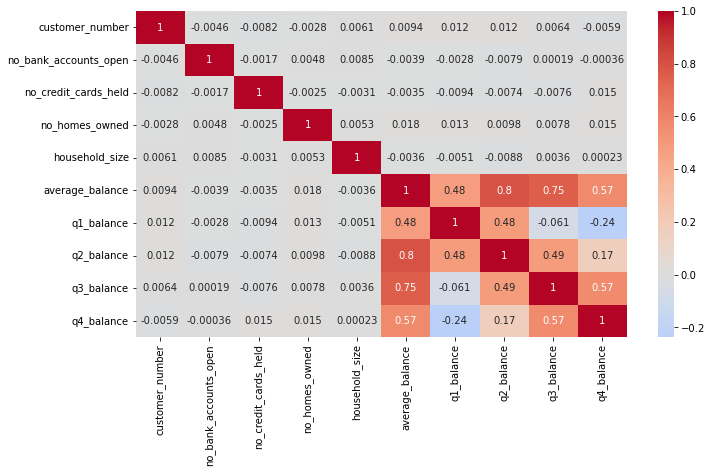

In [11]:
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', center=0);

### Dropping customer_number

In [12]:
df.drop('customer_number', axis=1, inplace=True)

## Feature Engineering

In [13]:
# engineer a final column with whether the balance has been going up or down

In [14]:
# if q4 > q1 then up, else down

df['trend'] = df['q4_balance'] - df['q1_balance']
df['trend'] = df['trend'].apply(lambda x:'up'if x>0 else 'down')


## Changing some columns to categorical

In [15]:
#no_bank_accounts_open, no_credit_cards_held, no_homes_owned, household_size

In [16]:
df['no_bank_accounts_open'] = df['no_bank_accounts_open'].astype('object')
df['no_credit_cards_held'] = df['no_credit_cards_held'].astype('object')
df['no_homes_owned'] = df['no_homes_owned'].astype('object')
df['household_size'] = df['household_size'].astype('object')

### More EDA

In [17]:
#sns.pairplot(df, kind='scatter', hue='offer_accepted')

## Modelling

### Splitting in numerical and categorical

In [18]:
df.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'no_bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'no_credit_cards_held', 'no_homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance', 'trend'],
      dtype='object')

In [19]:
X = df.select_dtypes(include=np. number)
cat = df.select_dtypes(include=object)
cat.drop('offer_accepted', axis=1, inplace=True)
y = df['offer_accepted']

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Looking at chi-squared

In [20]:
from scipy.stats import chi2_contingency

In [21]:
contingency= pd.crosstab(df['credit_rating'], df['offer_accepted']) 

<AxesSubplot:xlabel='offer_accepted', ylabel='credit_rating'>

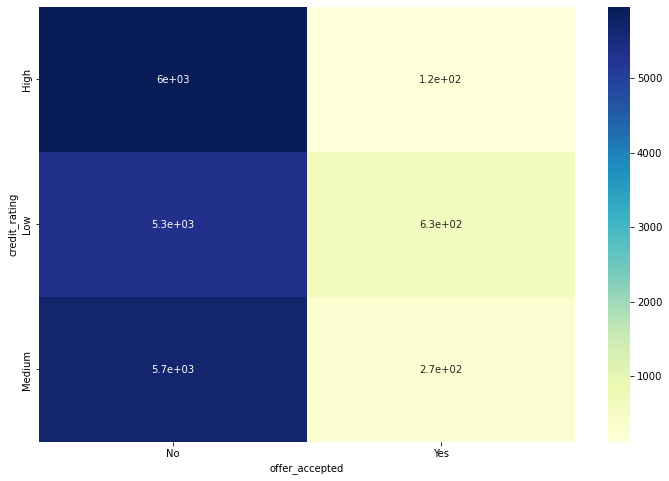

In [22]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [23]:
#.select_dtypes(include='object')

In [24]:
for x in df.columns:
    contingency= pd.crosstab(df[x], df['offer_accepted'])
    print('chi_squared p-value',x, 'is', chi2_contingency(contingency, correction=False)[1])

chi_squared p-value offer_accepted is 0.0
chi_squared p-value reward is 7.103826919269613e-23
chi_squared p-value mailer_type is 4.1914413632040166e-39
chi_squared p-value income_level is 1.463496214215802e-25
chi_squared p-value no_bank_accounts_open is 0.5787148519062763
chi_squared p-value overdraft_protection is 0.7040047254941093
chi_squared p-value credit_rating is 5.967269417919421e-97
chi_squared p-value no_credit_cards_held is 0.7191405379088973
chi_squared p-value no_homes_owned is 0.8816359414526597
chi_squared p-value household_size is 0.0004550923324748873
chi_squared p-value own_your_home is 0.9673462118280213
chi_squared p-value average_balance is 0.742456654640453
chi_squared p-value q1_balance is 0.9457615612955838
chi_squared p-value q2_balance is 0.867193996078398
chi_squared p-value q3_balance is 0.15815571380942853
chi_squared p-value q4_balance is 0.022108533606291208
chi_squared p-value trend is 0.21898650780403126


### Looking for outliers

In [25]:
# consider whether to deal with outliers

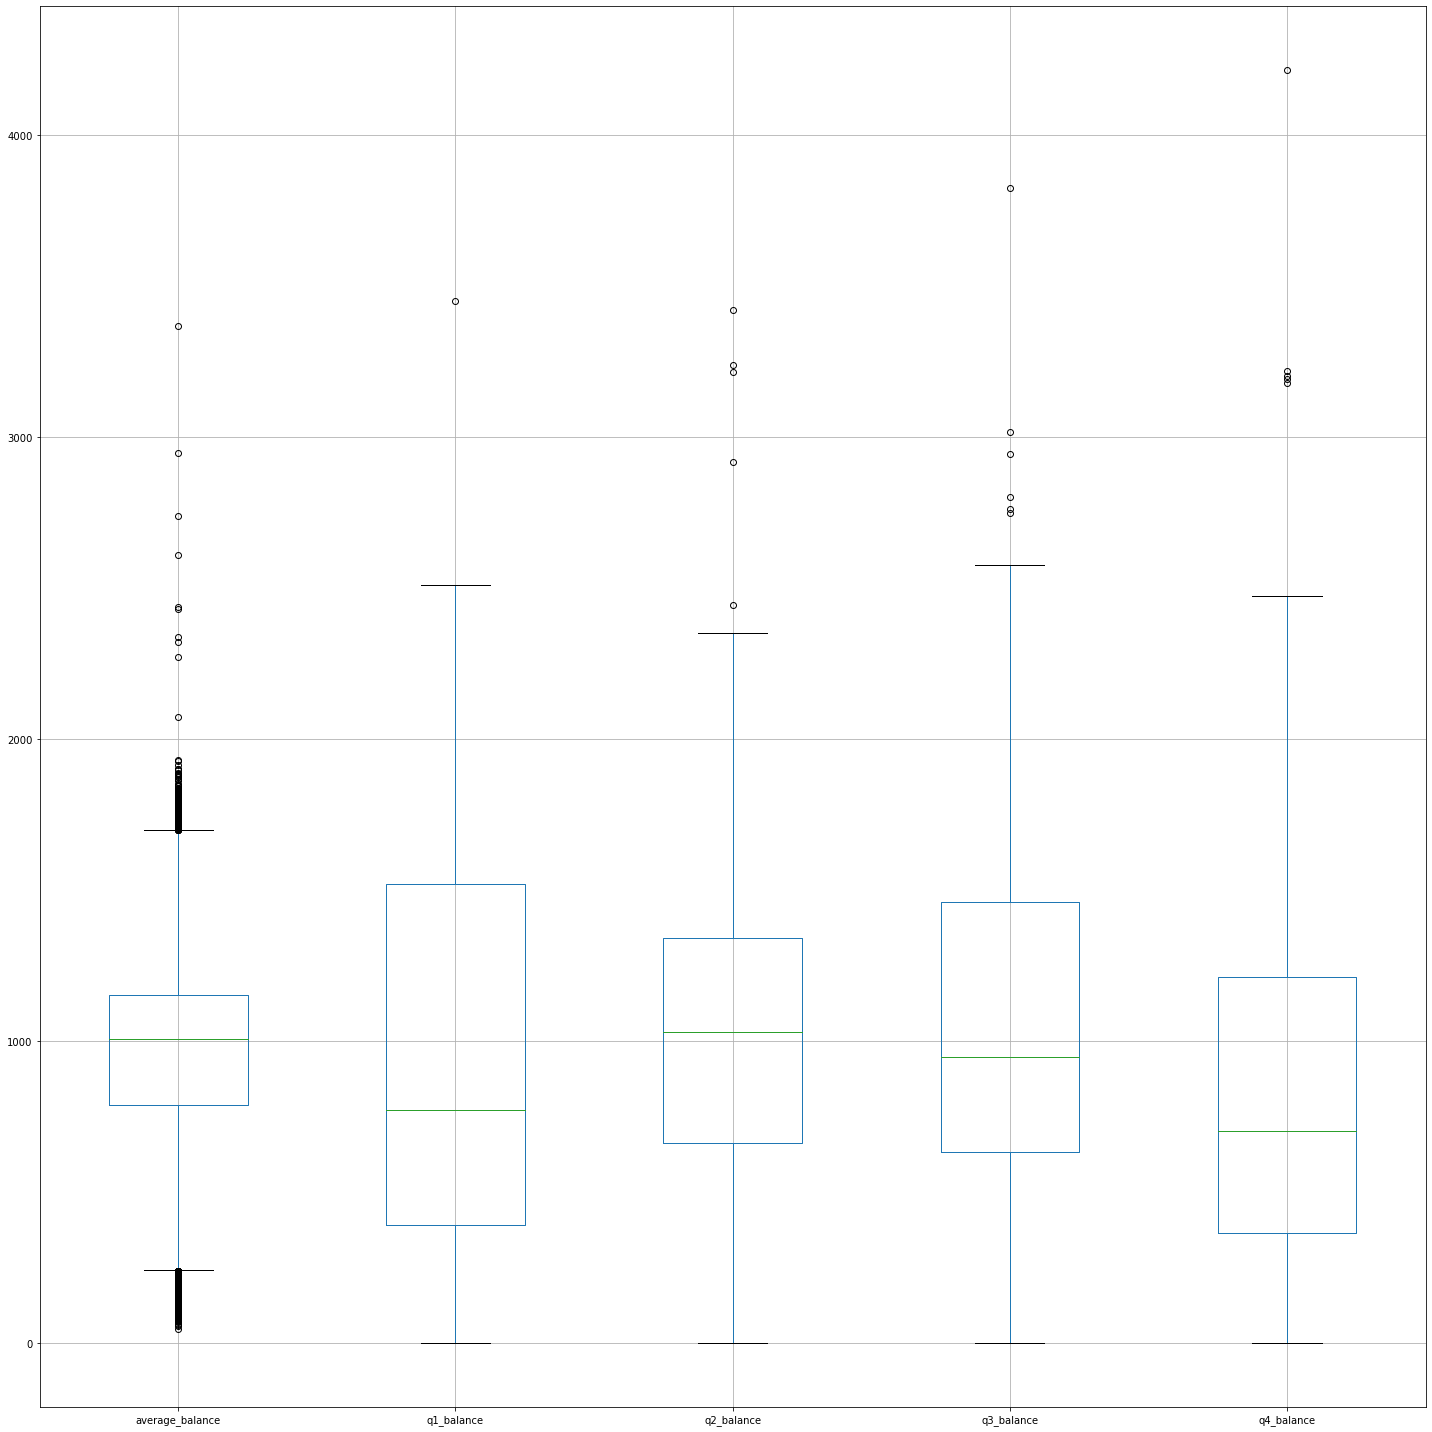

In [26]:
plt.figure(figsize=(20, 20))
X.boxplot()
plt.tight_layout()

### scaling numerical data

In [27]:
#sns.pairplot(X)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x = pd.DataFrame(x_scaled, columns = X.columns)

In [30]:
#sns.pairplot(x)

### Getting dummies for categorical data

In [31]:
categorical = pd.get_dummies(cat, drop_first=True)

In [32]:
categorical

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,no_bank_accounts_open_2,no_bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,...,no_homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes,trend_up
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
2,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
17996,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
17997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
17998,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1


### Concatenating data

In [33]:
x_full = pd.concat([x, categorical], axis=1)

## Model Candidate 1

### Imports

In [34]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [229]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [230]:
lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_pred =lr.predict(X_test)

In [231]:
y_train.value_counts()

No     11862
Yes      738
Name: offer_accepted, dtype: int64

In [232]:
accuracy_score(y_pred, y_test)

0.9472222222222222

In [233]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


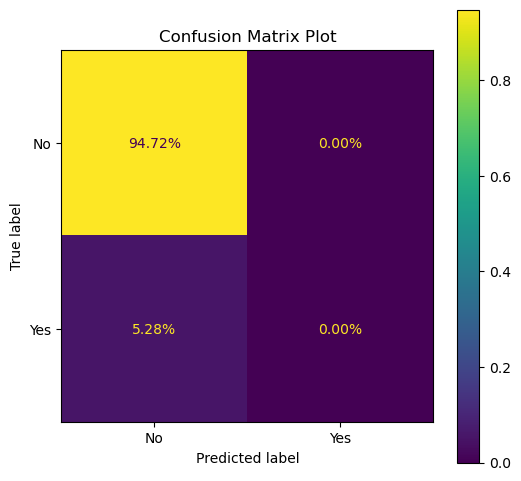

In [234]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

### ROC Plot

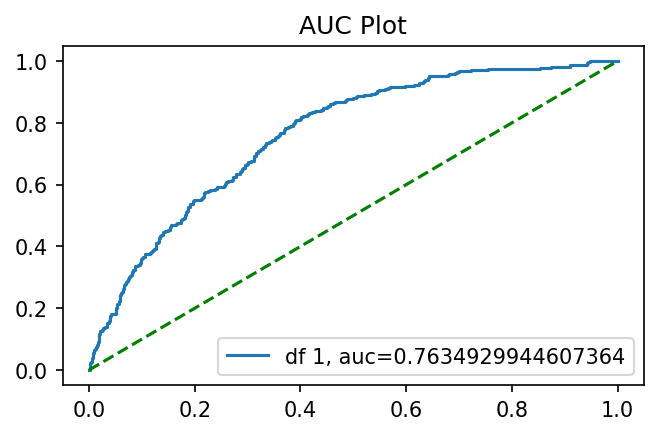

In [235]:
import sklearn.metrics as metrics
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Model Candidate 2
### Using SMOTE to fix imbalance in data

In [236]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [237]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [238]:
len(X_train_sm), len(y_train_sm)

(23724, 23724)

In [239]:
y_train_sm.value_counts()

Yes    11862
No     11862
Name: offer_accepted, dtype: int64

In [240]:
lr = LogisticRegression(max_iter=400).fit(X_train_sm, y_train_sm)
y_pred_sm =lr.predict(X_test)

In [241]:
accuracy_score(y_test ,y_pred_sm)

0.767962962962963

In [242]:
pd.DataFrame(classification_report(y_test, y_pred_sm, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.959762,0.096667,0.767963,0.528214,0.914210
recall,0.788074,0.407018,0.767963,0.597546,0.767963
f1-score,0.865486,0.156229,0.767963,0.510857,0.828053
support,5115.000000,285.000000,0.767963,5400.000000,5400.000000


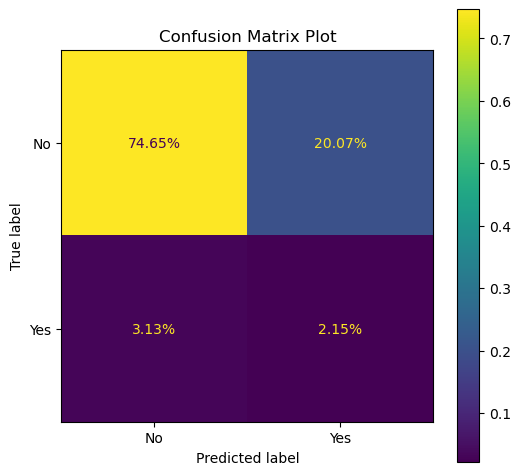

In [243]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

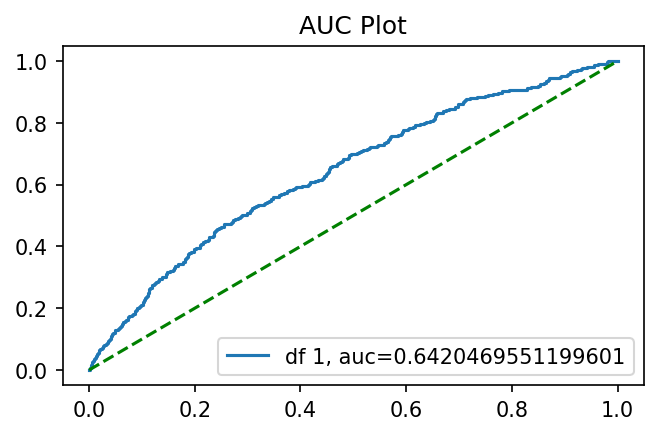

In [244]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## TOMEK LINKS 3
### Using Tomek Links to undersample

In [245]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')

In [246]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [247]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [248]:
y_train_tk.value_counts()

No     11566
Yes      738
Name: offer_accepted, dtype: int64

In [249]:
lr.fit(X_train_tk, y_train_tk)
y_pred_tk = lr.predict(X_test)

In [250]:
accuracy_score(y_test, y_pred_tk)

0.9472222222222222

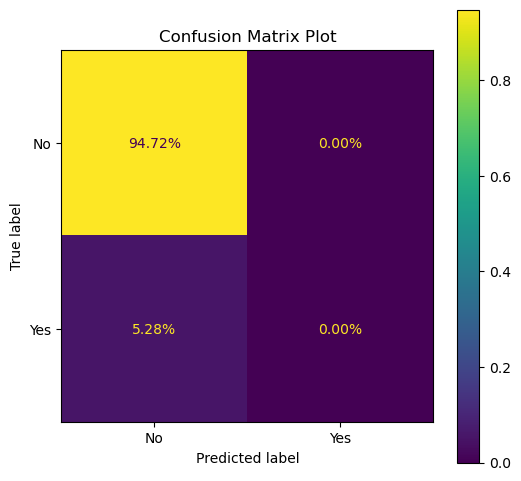

In [251]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

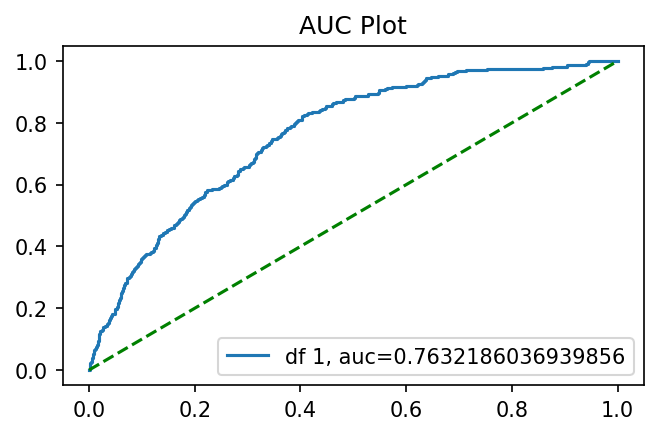

In [252]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Model Candidate 4
### LR  - Using Smote and Tomek together

In [253]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [254]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [255]:
y_train_tk.value_counts()

No     11566
Yes      738
Name: offer_accepted, dtype: int64

In [256]:
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [257]:
y_train_tk_sm.value_counts()

Yes    11566
No     11566
Name: offer_accepted, dtype: int64

In [258]:
lr = LogisticRegression(max_iter=400).fit(X_train_tk_sm, y_train_tk_sm)
y_pred_tk_sm = lr.predict(X_test)

In [259]:
accuracy_score(y_test, y_pred_tk_sm)

0.7625925925925926

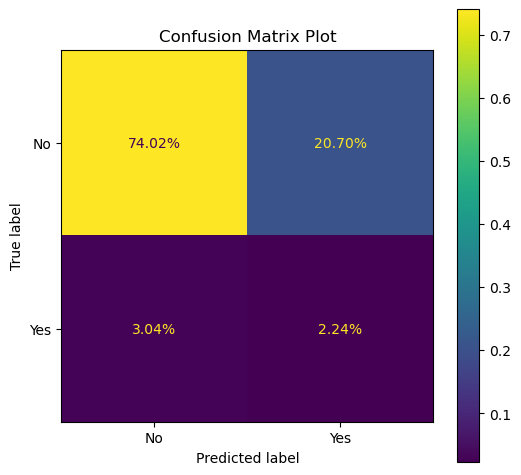

In [260]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

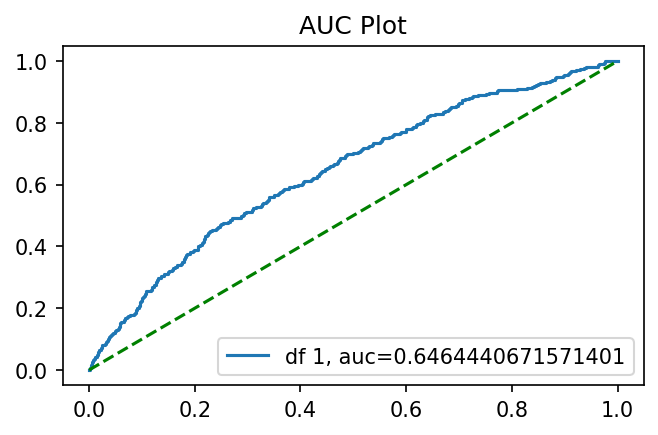

In [261]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Model Candidate 5
### K Nearest Neighbours - with smote + tomek

In [262]:
from sklearn.neighbors import KNeighborsClassifier

In [263]:
kn = KNeighborsClassifier(n_neighbors=5, p=3)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [264]:
accuracy_score(y_test ,y_pred_kn)


0.6992592592592592

In [265]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.959947,0.082866,0.699259,0.521407,0.913657
recall,0.712219,0.466667,0.699259,0.589443,0.699259
f1-score,0.817733,0.140741,0.699259,0.479237,0.782003
support,5115.000000,285.000000,0.699259,5400.000000,5400.000000


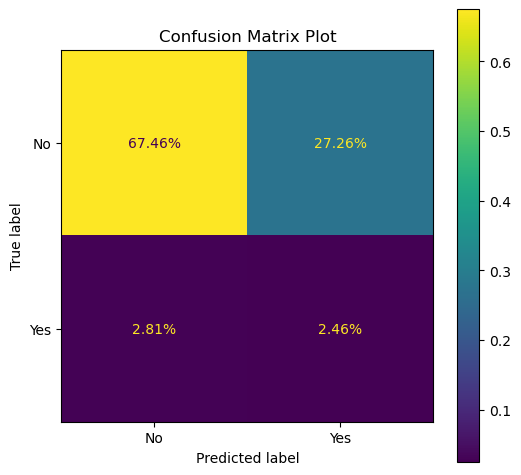

In [266]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

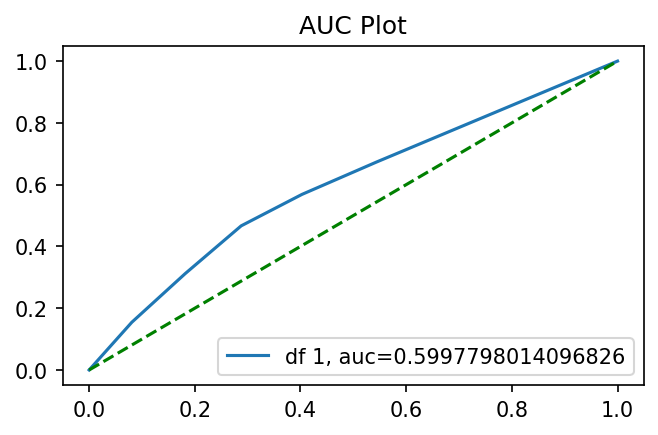

In [267]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = kn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 6
### Random Forest - with smote + tomek

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
rf=RandomForestClassifier(n_estimators=10)

rf.fit(X_train_tk_sm,y_train_tk_sm)

y_pred_rf=rf.predict(X_test)

In [270]:
accuracy_score(y_test ,y_pred_rf)

0.8981481481481481

In [271]:
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.950820,0.106825,0.898148,0.528822,0.906276
recall,0.941153,0.126316,0.898148,0.533735,0.898148
f1-score,0.945962,0.115756,0.898148,0.530859,0.902145
support,5115.000000,285.000000,0.898148,5400.000000,5400.000000


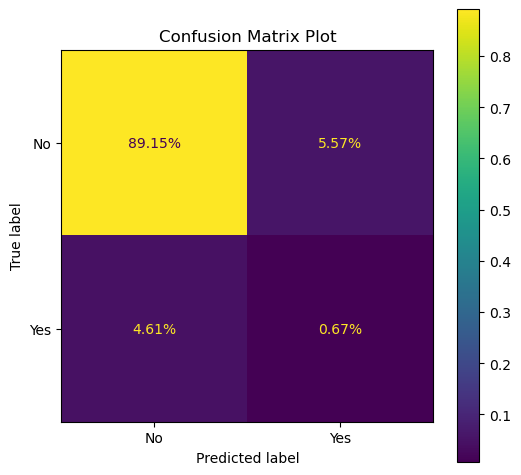

In [272]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

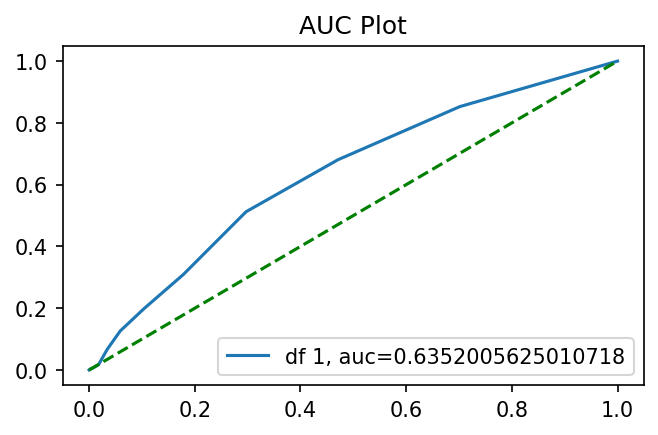

In [273]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 7
### Decision Tree

In [274]:
from sklearn import tree

In [275]:
tr = tree.DecisionTreeClassifier().fit(X_train_tk_sm, y_train_tk_sm)

In [276]:
y_pred_tr = tr.predict(X_test)

In [277]:
accuracy_score(y_test ,y_pred_kn)


0.6992592592592592

In [278]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.959947,0.082866,0.699259,0.521407,0.913657
recall,0.712219,0.466667,0.699259,0.589443,0.699259
f1-score,0.817733,0.140741,0.699259,0.479237,0.782003
support,5115.000000,285.000000,0.699259,5400.000000,5400.000000


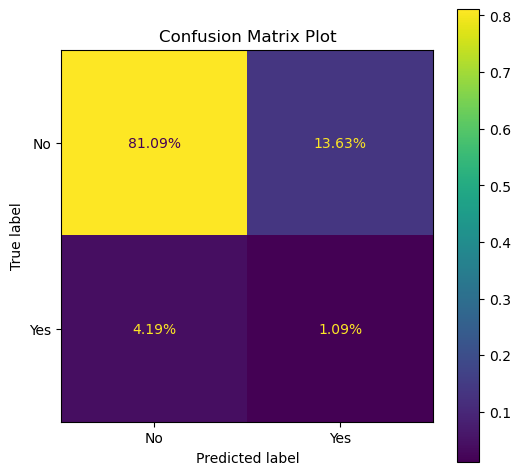

In [279]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(tr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

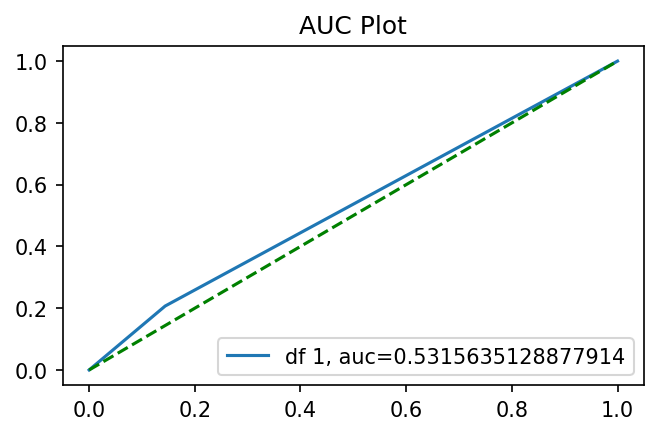

In [280]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = tr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 8
### dropping average_balance
### with n_nearest neighbours

In [281]:
x_full_2 = x_full.drop(['q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],axis = 1)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(x_full_2, y, test_size=0.3, random_state=100)

In [283]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [284]:
y_train_tk.value_counts()

No     11533
Yes      738
Name: offer_accepted, dtype: int64

In [285]:
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [286]:
kn = KNeighborsClassifier(n_neighbors=5, p=3)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [287]:
accuracy_score(y_test ,y_pred_kn)


0.7255555555555555

In [288]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.957903,0.082345,0.725556,0.520124,0.911693
recall,0.742913,0.414035,0.725556,0.578474,0.725556
f1-score,0.836820,0.137369,0.725556,0.487095,0.799905
support,5115.000000,285.000000,0.725556,5400.000000,5400.000000


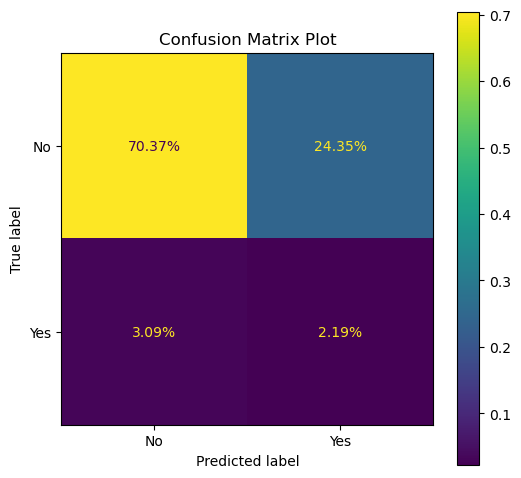

In [289]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

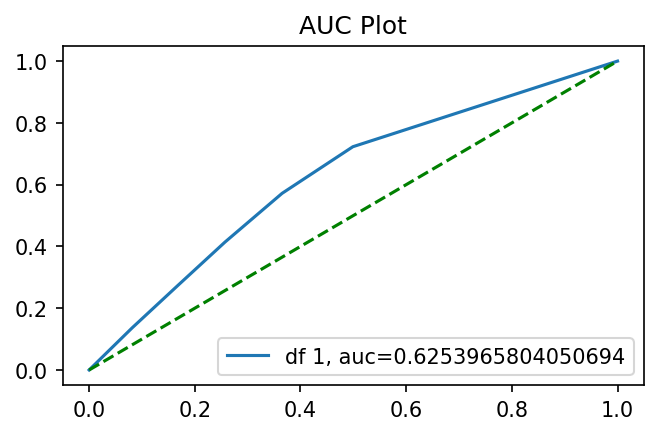

In [290]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = kn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 9

### Random over sampling with random forest

In [35]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [63]:
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

In [64]:
rf=RandomForestClassifier(n_estimators=10)

rf.fit(X_train_os,y_train_os)

y_pred_rf_os=rf.predict(X_test)

In [65]:
y_train_os.value_counts()

Yes    11862
No     11862
Name: offer_accepted, dtype: int64

In [66]:
accuracy_score(y_pred_rf_os, y_test)

0.942962962962963

In [67]:
pd.DataFrame(classification_report(y_test, y_pred_rf_os, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947829,0.151515,0.942963,0.549672,0.905802
recall,0.994526,0.017544,0.942963,0.506035,0.942963
f1-score,0.970616,0.031447,0.942963,0.501031,0.921049
support,5115.000000,285.000000,0.942963,5400.000000,5400.000000


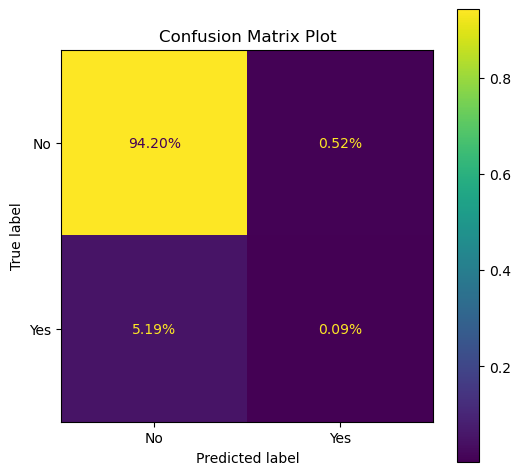

In [68]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

### ROC Plot

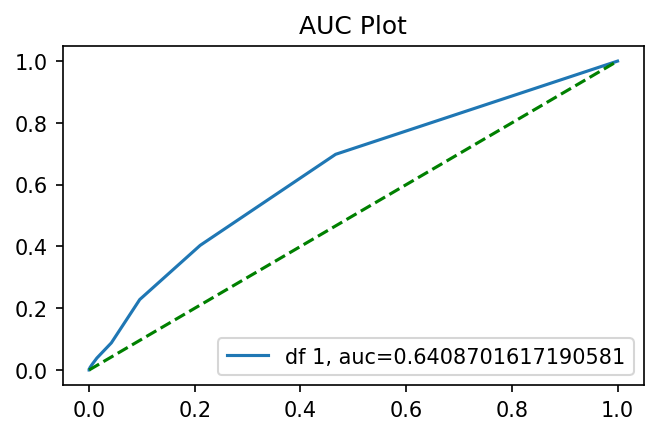

In [69]:
import sklearn.metrics as metrics
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);